In [17]:
#Projekt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

print('Working')

df = pd.read_csv("Sales_prediction_Colombia.csv")
#data_top = df.head()
#data_top 

for col in df.columns: 
    print(col) 

Working
Unnamed: 0
antiguedad_original
area
areabalcon
areaconstruida
areaterraza
balcon
banos
banoservicio
conjuntocerrado
cuarto_de_escoltas
cuartodeservicio
depositoocuartoutil
depositos
estrato
estudioobiblioteca
garajecubierto
garajes
gimnasio
habitaciones
halldealcobasoestar
instalaciondegas
jacuzzi
jardin
latitud
longitud
numeroascensores
parqueaderovisitantes
piscina
plantaelectrica
porteriaovigilancia
remodelado
saloncomunal
sauna_yo_turco
terraza
tiempodeconstruido
tipodegaraje
valor
valorventa
vigilancia
vista
zona_de_bbq
zonadelavanderia
zonaninos
zonasverdes


In [18]:
df = df.drop(columns=["areaconstruida", "antiguedad_original", "balcon", "banoservicio", "conjuntocerrado", 
                      "cuarto_de_escoltas", "cuartodeservicio", "depositoocuartoutil",
                      "depositos", "estudioobiblioteca", "garajecubierto", "gimnasio",
                      "instalaciondegas", "jacuzzi", "latitud", "longitud", "numeroascensores", 
                      "parqueaderovisitantes", "porteriaovigilancia", "piscina", "plantaelectrica", "remodelado",
                      "saloncomunal", "sauna_yo_turco", "terraza", "tipodegaraje", "valor",
                      "vigilancia", "vista", "zona_de_bbq", "zonadelavanderia", "zonaninos",
                      "zonasverdes"])

for col in df.columns: 
    print(col) 
df.isnull().values.any()

Unnamed: 0
area
areabalcon
areaterraza
banos
estrato
garajes
habitaciones
halldealcobasoestar
jardin
tiempodeconstruido
valorventa


True

In [19]:

df = df.fillna(0) 
df = df.replace(to_replace = "Si",
                 value = 1)
df = df.replace(to_replace = "Entre 0 y 5 años",
                 value = 0)
df = df.replace(to_replace = "Entre 5 y 10 años",
                 value = 1)
df = df.replace(to_replace = "Entre 10 y 20 años",
                 value = 2)
df = df.replace(to_replace = "Más de 20 años",
                 value = 3)
print(df)
df.isnull().values.any()

        Unnamed: 0   area  areabalcon  areaterraza  banos  estrato  garajes  \
0                0  145.0       10.00        10.00    3.0      6.0      2.0   
1                1  114.0        0.00         0.00    3.0      4.0      0.0   
2                2  170.0       30.00        30.00    4.0      6.0      3.0   
3                3   61.0        0.00         0.00    1.0      6.0      1.0   
4                4  120.5        0.00         0.00    3.0      0.0      2.0   
...            ...    ...         ...          ...    ...      ...      ...   
145547      145547  118.0        0.00         0.00    3.0      5.0      1.0   
145548      145548   89.0       10.00        10.00    3.0      3.0      1.0   
145549      145549   88.0        0.00         0.00    3.0      6.0      2.0   
145550      145550  173.0       25.68        25.68    3.0      6.0      3.0   
145551      145551  106.0        0.00         0.00    2.0      3.0      1.0   

        habitaciones  halldealcobasoestar  jardin  

False

In [20]:


df1 = df.loc[df['Unnamed: 0'] % 2 == 1]
df2 = df.loc[df['Unnamed: 0'] % 2 == 0]
df3 = df.loc[df['Unnamed: 0'] < 100]
#print(df1)
#print(df2)

0     145.0
1     114.0
2     170.0
3      61.0
4     120.5
      ...  
95    132.0
96     74.0
97    230.0
98     55.0
99     60.0
Name: area, Length: 100, dtype: float64
0     9.000000e+08
1     5.481475e+08
2     1.500000e+09
3     4.950000e+08
4     8.500000e+08
          ...     
95    7.800000e+08
96    2.900000e+08
97    1.600000e+09
98    1.490000e+08
99    1.500000e+08
Name: valorventa, Length: 100, dtype: float64


[]

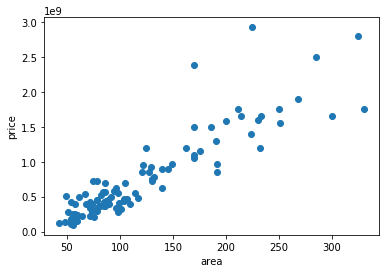

In [21]:
import matplotlib.pyplot as plt
#regresja
#df_X = df.data
#df_Y = df.target
#df1.plot(figsize=(18,5))
#X = df2['area', 'areabalcon', 'areaterraza',  'banos',  'estrato',  'garajes', 'habitaciones',  'halldealcobasoestar',  'jardin',  'tiempodeconstruido']
X = df3['area']
Y = df3['valorventa']
print(X)
print(Y)
plt.scatter(X, Y)
plt.xlabel('area')
plt.ylabel('price')
plt.plot()

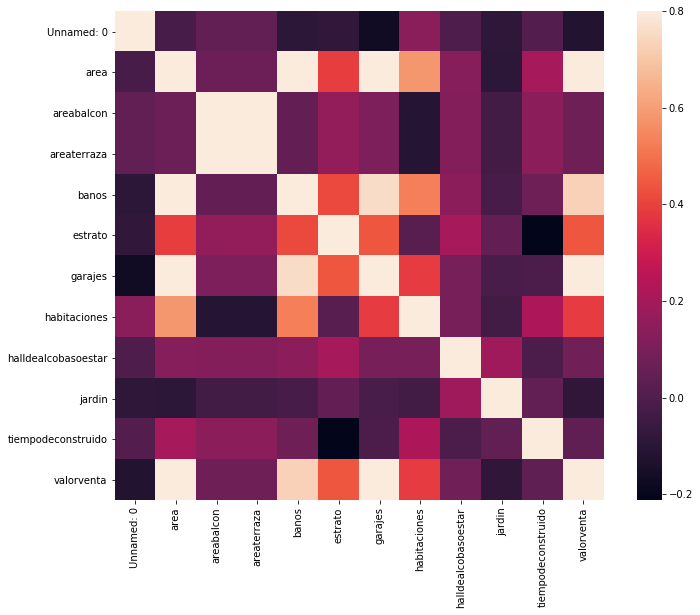

In [22]:
import seaborn as sns

#Correlation Heatmap
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [28]:
k = 10
cols = corrmat.nlargest(k, 'valorventa')['valorventa'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,valorventa
1,area
2,garajes
3,banos
4,estrato
5,habitaciones
6,halldealcobasoestar
7,areabalcon
8,areaterraza
9,tiempodeconstruido


0     6.0
1     4.0
2     6.0
3     6.0
4     0.0
     ... 
95    6.0
96    3.0
97    6.0
98    3.0
99    3.0
Name: estrato, Length: 100, dtype: float64
0     9.000000e+08
1     5.481475e+08
2     1.500000e+09
3     4.950000e+08
4     8.500000e+08
          ...     
95    7.800000e+08
96    2.900000e+08
97    1.600000e+09
98    1.490000e+08
99    1.500000e+08
Name: valorventa, Length: 100, dtype: float64


[]

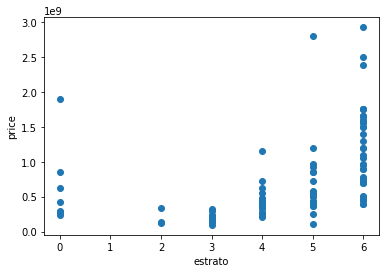

In [29]:
X = df3['estrato']
Y = df3['valorventa']
print(X)
print(Y)
plt.scatter(X, Y)
plt.xlabel('estrato')
plt.ylabel('price')
plt.plot()

In [30]:
df3.head()
reg = linear_model.LinearRegression()

labels = df3['valorventa']
train1 = df3.drop(['Unnamed: 0', 'valorventa'], axis = 1)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)

reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
reg.score(x_train, y_train)

0.8639680869674567

In [33]:
reg.score(x_test, y_test)

0.8277438985792953

In [41]:
from sklearn import metrics
#from sklearn.model_selection import GridSearchCVprint("R^2 dla stopnia ", ": {}".format(metrics.r2_score(y_test, reg.predict(x_test)))

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(x_train, y_train)
grid_1.best_params_

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.183046647027712e+18, tolerance: 3208409791520931.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7981653454964813e+18, tolerance: 2577583827775797.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.320223469656467e+17, tolerance: 2562629864685447.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5928763195110374e+17, tolerance: 2657614160797556.5
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.604534520206948e+17, tolerance: 2680762215264928.5
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.97

c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.720479602098093e+17, tolerance: 2657614160797556.5
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4414155100239862e+17, tolerance: 2680762215264928.5
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.463049426048517e+17, tolerance: 3208409791520931.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.48

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 1}

In [43]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(), Lasso(random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.01, 0.1, 1, 10]
                               },
                    cv=kfold,
                    refit=True)
grid_2.fit(x_train, y_train)
grid_2.best_params_

c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.762478041603146e+17, tolerance: 3208409791520931.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.828940790052193e+17, tolerance: 2577583827775797.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.758785664110199e+17, tolerance: 2562629864685447.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.931

c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.499318383441303e+17, tolerance: 3208409791520931.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3811658675476274e+17, tolerance: 2577583827775797.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4662862071321066e+17, tolerance: 2562629864685447.0
  positive)
c:\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1

{'lasso__alpha': 10, 'polynomialfeatures__degree': 1}

In [44]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(), Ridge(random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.01, 0.1, 1, 10]
                               },
                    cv=kfold,
                    refit=True)
grid_3.fit(x_train, y_train)
grid_3.best_params_

c:\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: Use

{'polynomialfeatures__degree': 1, 'ridge__alpha': 10}

In [45]:
models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('LinearRegression', reg))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(x_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(x_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(x_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(x_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(x_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(x_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(x_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(x_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(x_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(x_test)))

ElasticNet
R^2: 0.8496701133059624
Explained variance score: 0.8649722099371111
Median absolute error: 81178935.5132016
Mean squared error: 3.91800649618786e+16
Mean absolute errors: 151403969.6397851
LinearRegression
R^2: 0.8277438985792953
Explained variance score: 0.8399826474734895
Median absolute error: 138421779.21044773
Mean squared error: 4.489463400899935e+16
Mean absolute errors: 176954291.84488723
Lasso
R^2: 0.8277438791802623
Explained variance score: 0.8399826500450263
Median absolute error: 138421729.58437216
Mean squared error: 4.489463906491601e+16
Mean absolute errors: 176954285.08165237
Ridge
R^2: 0.8393474490557885
Explained variance score: 0.8523876403694086
Median absolute error: 134282198.8775506
Mean squared error: 4.187043255807474e+16
Mean absolute errors: 166076930.52322224


In [46]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LinearRegression', 'ElasticNet', 'Lasso', 'Ridge'])#,'Lasso','Ridge','LR'])
#df.insert(loc=1, column='Method', value=['LinearRegression'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LinearRegression,0.849670,0.864972,8.117894e+07,3.918006e+16,1.514040e+08
1,ElasticNet,0.827744,0.839983,1.384218e+08,4.489463e+16,1.769543e+08
2,Lasso,0.827744,0.839983,1.384217e+08,4.489464e+16,1.769543e+08
3,Ridge,0.839347,0.852388,1.342822e+08,4.187043e+16,1.660769e+08


In [47]:
from sklearn.linear_model import LogisticRegression

#log_reg = LogisticRegression(random_state=42)
#log_reg.fit(x_train, y_train)

In [48]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

print(x_train)

     area  areabalcon  areaterraza  banos  estrato  garajes  habitaciones  \
99   60.0         0.0          0.0    1.0      3.0      0.0           3.0   
92   90.0         0.0          0.0    2.0      4.0      2.0           3.0   
76   82.0         0.0          0.0    2.0      5.0      2.0           2.0   
14  107.0         0.0          0.0    2.0      4.0      2.0           3.0   
0   145.0        10.0         10.0    3.0      6.0      2.0           3.0   
..    ...         ...          ...    ...      ...      ...           ...   
43   81.0         0.0          0.0    3.0      5.0      1.0           3.0   
22  129.0         0.0          0.0    3.0      5.0      2.0           3.0   
72  140.0         0.0          0.0    4.0      6.0      2.0           3.0   
15  268.0         0.0          0.0    5.0      0.0      4.0           5.0   
40  200.0         1.0          1.0    4.0      6.0      2.0           3.0   

    halldealcobasoestar  jardin  tiempodeconstruido  
99                   

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [56]:
def to_categorical(y, num_classes=None, dtype='float32'):

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

pipe1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="rbf"))])

param_grid1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe1, param_grid1, cv=kfold, return_train_score=True)

grid_1.fit(x_train, y_train)
#grid_1.best_params_

IndexError: index 150000000 is out of bounds for axis 1 with size 2

In [123]:
print(y_train)

99    1.500000e+08
92    3.950000e+08
76    5.300000e+08
14    4.650000e+08
0     9.000000e+08
          ...     
43    3.600000e+08
22    9.312480e+08
72    8.900000e+08
15    1.900000e+09
40    1.580000e+09
Name: valorventa, Length: 90, dtype: float64
